In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# K-prototypes

## Load Data

Let's work now with a different dataset

In [2]:
dat = pd.read_csv("../i2.csv", sep = ";")
dat.head()

,user,booking_date,origin_airport,price,sales channel,ant
0,user5,2018-11-01,MAD,58.200001,online,7
1,user7,2018-11-01,DUB,147.500000,online,38
2,user4,2018-11-02,TFS,24.049999,online,19
3,user8,2018-10-29,MAD,59.709999,online,8
4,user7,2018-11-01,LPA,37.299999,call center,4


## K-means model

Let's try to apply K-means to tour dataset

In [3]:
# [1] Import model
from sklearn.cluster import KMeans
model_f = KMeans

# [2] Import metric

# [3] Define model
model = model_f(n_clusters = 4)

# [4] Train model
model.fit(dat)

# [5] Predict
y_kmeans = model.predict(dat)
y_kmeans 

# [6] Compute metric

ValueError: could not convert string to float: 'user5'

**Error!** What happened?

## K-prototypes

K-means only accepts numerical variables. If you have categorical values on your dataset you have to discard them or transform them into numerical variables with a pre-processing step like one-hot encoding.

K-prototypes is an enhanced version of K-means that allows you to mix numerical and categorical data.

It applies this following formula:

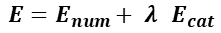

where $\lambda$ is parameter that controls (balances) the weight impact of numerical and control variables.


In [5]:
from kmodes.kprototypes import KPrototypes
?KPrototypes

Check column classes

In [6]:
dat.dtypes

user               object
booking_date       object
origin_airport     object
price             float64
sales channel      object
ant                 int64
dtype: object

Extract categorical variables

In [7]:
categorical_columns = np.array(np.where(dat.dtypes == 'object'))[0].tolist()
categorical_columns

[0, 1, 2, 4]

In [8]:
# [1] Import model
model_f = KPrototypes

# [2] Import metric

# [3] Define model
model = model_f(n_clusters = 4)

# [4] Train model --> EXTRA ARGUMENT!!!
model.fit(dat, categorical = categorical_columns)

# [5] Predict
y_kmeans = model.predict(dat, categorical = categorical_columns)
y_kmeans 

# [6] Compute metric

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 1, 1, 1, 1, 3, 3, 0, 3, 0, 1,
       1, 1, 1, 3, 3, 0, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 0, 1,
       1, 3, 0, 0, 3, 0, 1, 1, 3, 3, 1, 1, 0, 1, 3, 0, 1, 1, 1, 1, 3, 3,
       0, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 0, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 0, 3, 3,
       1, 1, 1, 0, 3, 3, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 0,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 0, 1, 0, 1, 3, 3, 2,
       1, 1, 2, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 2, 3, 3, 3, 1, 1, 3,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 3, 3,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       3, 3, 0, 1, 0, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3,
       3, 1, 3, 2, 1, 3, 1, 3, 1, 1, 3, 0, 1, 0, 1, 3, 3, 3, 1, 1, 0, 1,
       1, 1, 2, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 0,

## Results Visualization

Let's visualize our clusters cheking only price and sales channel variables.

AttributeError: 'KPrototypes' object has no attribute 'cluster_centers_'

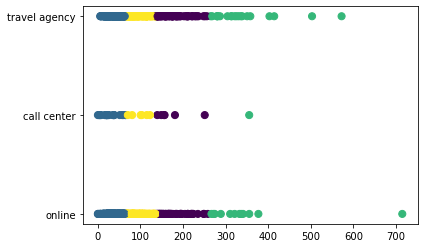

In [15]:
plt.scatter(dat['price'], dat['sales channel'], c = y_kmeans, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 5], c='black', s=200, alpha=0.5);

Attribute cluster_centers_ does not exist. You should use cluster_centroids.

In [11]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_enc_cluster_centroids',
 '_enc_map',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'cat_dissim',
 'cluster_centroids_',
 'cost_',
 'epoch_costs_',
 'fit',
 'fit_predict',
 'gamma',
 'get_params',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'num_dissim',
 'predict',
 'random_state',
 'set_params',
 'verbose']

In [12]:
centers = model.cluster_centroids_
centers

array([['177.9967203369202', '27.712', 'user2', '2018-11-01', 'MAD',
        'travel agency'],
       ['37.45093859403899', '25.21480144404332', 'user4', '2018-11-01',
        'MAD', 'online'],
       ['345.1887882116974', '20.181818181818183', 'user7', '2018-11-01',
        'MAD', 'travel agency'],
       ['94.4570196723084', '24.36111111111111', 'user9', '2018-11-01',
        'MAD', 'online']], dtype='<U32')

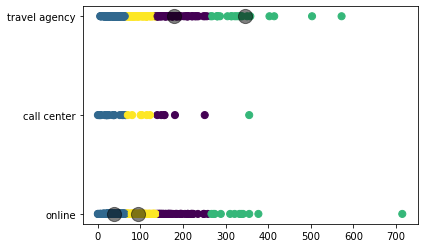

In [13]:
plt.scatter(dat['price'], dat['sales channel'], c = y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0].astype(float), centers[:, 5], c='black', s=200, alpha=0.5);

## K-modes

K-modes is a modified version of K-modes that only accepts categorical variables. It will be analogous to the second term on k-prototypes, i.e. $E_{cat}$ in this formula: 

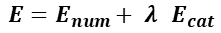


In [16]:
from kmodes.kmodes import KModes
?KModes

Check column classes

In [17]:
dat.dtypes

user               object
booking_date       object
origin_airport     object
price             float64
sales channel      object
ant                 int64
dtype: object

Extract categorical variables

In [18]:
categorical_columns = dat.columns[dat.dtypes == 'object']
categorical_columns

Index(['user', 'booking_date', 'origin_airport', 'sales channel'], dtype='object')

In [19]:
# [1] Import model
model_f = KModes

# [2] Import metric

# [3] Define model
model = model_f(n_clusters = 4)

# [4] Train model --> EXTRA FILTER!!!
model.fit(dat[categorical_columns])

# [5] Predict
y_kmeans = model.predict(dat[categorical_columns])
y_kmeans 

# [6] Compute metric

array([0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 3, 3, 0, 0, 3, 0, 0, 1,
       3, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2,
       0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0,
       0, 3, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 3, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0, 3, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 3, 0, 0, 0, 0, 1, 2, 2, 0, 0, 3, 0, 0, 0, 1, 1, 3, 0, 1, 2, 0,
       1, 0, 1, 3, 0, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0,
       0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 3, 0, 1, 0, 3, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1,

In [20]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_enc_cluster_centroids',
 '_enc_map',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'cat_dissim',
 'cluster_centroids_',
 'cost_',
 'epoch_costs_',
 'fit',
 'fit_predict',
 'get_params',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'predict',
 'random_state',
 'set_params',
 'verbose']

## Results Visualization

Let's visualize our clusters cheking only user and sales channel variables.

In [21]:
centers = model.cluster_centroids_
centers

array([['user9', '2018-11-01', 'MAD', 'online'],
       ['user3', '2018-11-01', 'MAD', 'travel agency'],
       ['user1', '2018-11-01', 'MAD', 'travel agency'],
       ['user3', '2018-11-01', 'TFN', 'online']], dtype='<U13')

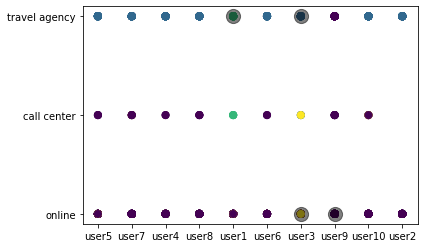

In [22]:
plt.scatter(dat['user'], dat['sales channel'], c = y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 3], c='black', s=200, alpha=0.5);